In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px



from gradient_boosting_trees.gradient_boosting import GradientBoostingRegression
from gradient_boosting_trees.decision_trees.cart import CartRegressionTree

# Setting up 2-D data (with one feature)

In [11]:
X = np.arange(20, step=0.01)
Y = np.cos(X)
X = X.reshape(len(X), 1)

In [12]:
data = pd.DataFrame(list(zip(X.ravel(), Y)), columns=["X", "Y"])

<Axes: xlabel='X', ylabel='Y'>

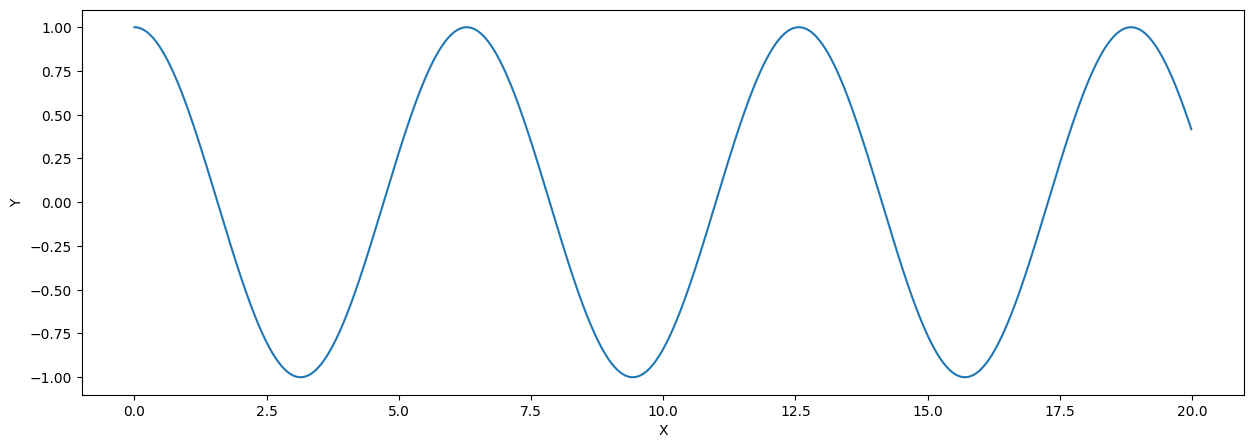

In [13]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=data, x=data["X"], y=data["Y"])

# Fitting an approximation to the cosine function

In [15]:
tree = CartRegressionTree(max_level=8, min_points=20)

In [16]:
tree.fit(points=X, labels=Y)

In [17]:
predictions = tree.predict(X)

In [29]:
data["predictions"] = predictions

<Axes: xlabel='X'>

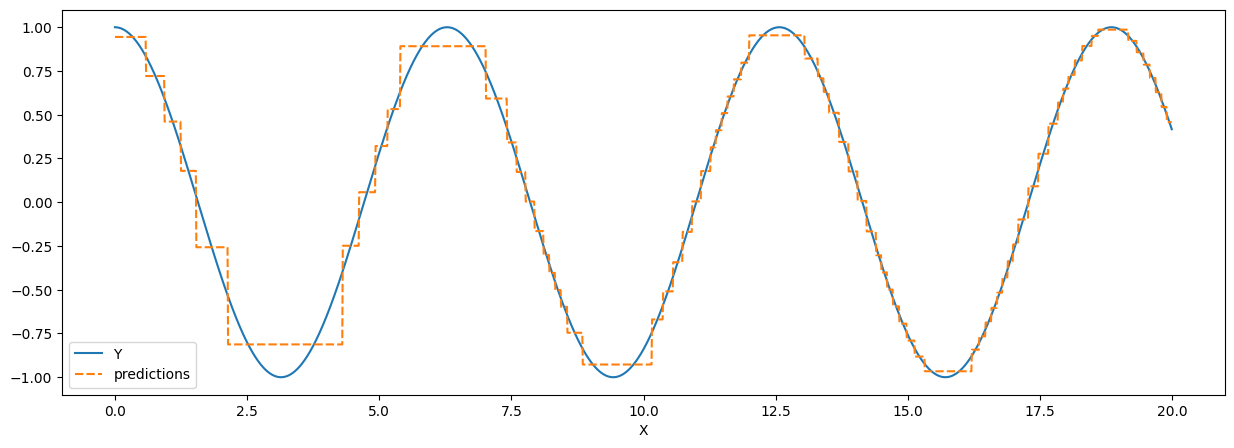

In [30]:
plt.figure(figsize=(15,5))
sns.lineplot(data.set_index("X"))

# Setting up 3D data (with 2 features)

In [10]:
X = np.arange(20, step=0.01)
Y = np.arange(10, 30, step=0.01)
Z = np.cos(X*Y/4)
# X = X.reshape(len(X), 1)

In [12]:
px.line_3d(x=X, y=Y, z=Z, width=1000, height=1000)

In [54]:
tree = CartRegressionTree(max_level=30, min_points=10)

In [55]:
points = np.hstack([X.reshape(len(X), 1), Y.reshape(len(Y), 1)])

In [56]:
tree.fit(points=points, labels=Z)

In [57]:
predictions = tree.predict(points=points)

In [62]:
data = pd.DataFrame(list(zip(X.ravel(), Y.ravel(), Z, ["Z" for _ in range(len(Z))])), columns=["X", "Y", "Z", "Type"])

In [71]:
data_pred = pd.DataFrame(list(zip(X.ravel(), Y.ravel(), predictions, ["Predictions" for _ in range(len(Z))])), columns=["X", "Y", "Z", "Type"])

In [72]:
plot_data = pd.concat([data, data_pred])

In [73]:
px.line_3d(data_frame=plot_data, x="X", y="Y", z="Z", width=1000, height=1000, color="Type")

## Gradient Boosting

In [2]:
gradient_boosting  = GradientBoostingRegression(shrinkage=0.01)

In [3]:
X = np.arange(20, step=0.01)
Y = np.cos(X)
X = X.reshape(len(X), 1)

In [4]:
labels = Y
points = X
n_iterations = 10000
from tqdm import tqdm

strong_predictions = np.zeros_like(labels)
weak_models = []
shrinkage = 0.001

for _ in tqdm(range(n_iterations)):
    error = strong_predictions - labels
    tree = CartRegressionTree(max_level=3, min_points=20)
    sample_idx = np.random.choice(np.arange(len(X)), 1500, replace=False)
    tree.fit(points=points[sample_idx], labels=error[sample_idx])
    weak_models.append(tree)
    weak_predictions = tree.predict(points=points)
    strong_predictions -= shrinkage * weak_predictions

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [05:22<00:00, 30.99it/s]


In [7]:
tree = CartRegressionTree(max_level=8, min_points=10)

In [8]:
tree.fit(points=X, labels=Y)

In [9]:
tree_preds = tree.predict(X)

<Axes: >

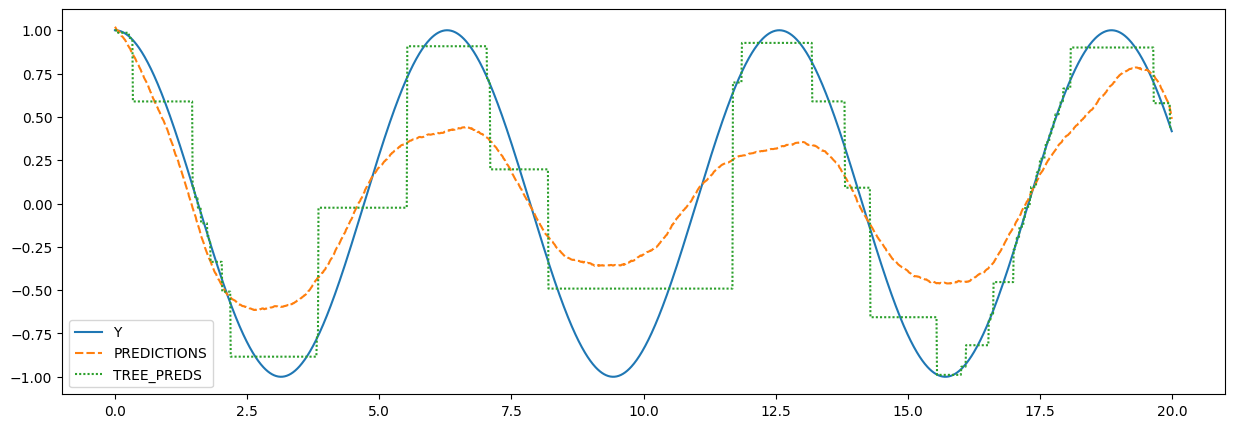

In [10]:
plt.figure(figsize=(15, 5))

data = pd.DataFrame(index=X.ravel(), data=list(zip(Y, strong_predictions, tree_preds)), columns=["Y", "PREDICTIONS", "TREE_PREDS"])
sns.lineplot(data=data)

In [13]:
gradient_boosting.fit(points=X, labels=Y, n_iterations=100)

100%|██████████| 100/100 [00:05<00:00, 19.91it/s]


In [ ]:
np.fromiter((weak_model.predict(X) for weak_model in gradient_boosting._weak_models), dtype=(np.float32, len(X)))

In [14]:
np.fromiter((weak_model.predict(X) for weak_model in gradient_boosting._weak_models), dtype=(np.float32, len(X))).sum(axis=0)

array([-847.9313  , -704.6462  , -541.58765 , ...,  -24.751886,
        -24.751886,  -24.751886], dtype=float32)

In [28]:
Y

array([1.        , 0.99995   , 0.99980001, ..., 0.43528269, 0.42625814,
       0.41719096])